In [1]:
import altair as alt
from bayes_window.generative_models import *
from bayes_window.visualization import plot_data, plot_data_slope_trials
from bayes_window import BayesWindow, models, workflow
from importlib import reload
alt.renderers.enable('altair_saver', fmts=['png']);

In [2]:
df, df_monster, index_cols, firing_rates = generate_fake_spikes(n_trials=40,
                                                                n_neurons=3,
                                                                n_mice=4,
                                                                dur=7,
                                                                mouse_response_slope=16)
df['log_isi'] = np.log10(df['isi'])


# data_details with posterior slopes

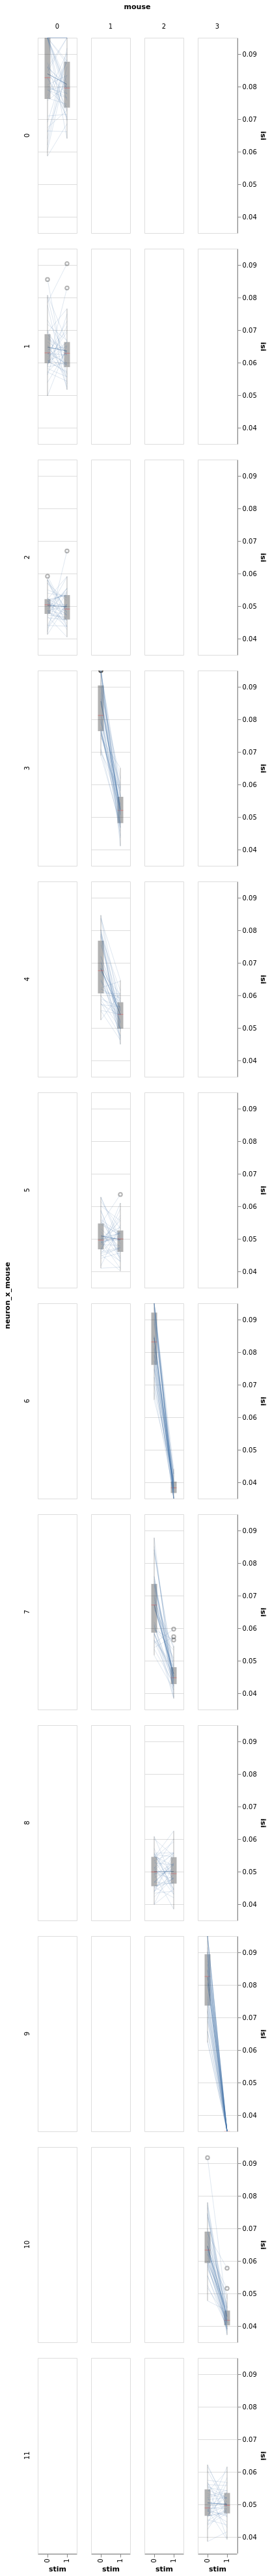

In [18]:

reload(workflow)
bw = workflow.BayesWindow(df, y='isi', treatment='stim', condition='neuron_x_mouse', group='mouse', detail='i_trial')
bw.chart_data_box_detail

In [19]:
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',)

n(Divergences) = 1


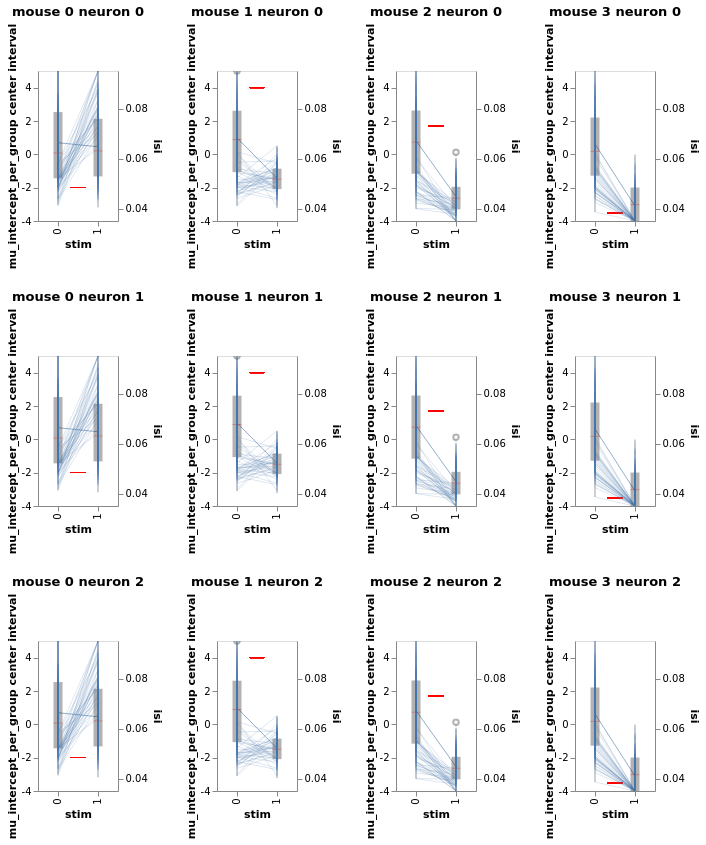

In [20]:
bw.plot_slopes_intercepts(row='neuron',column='mouse')

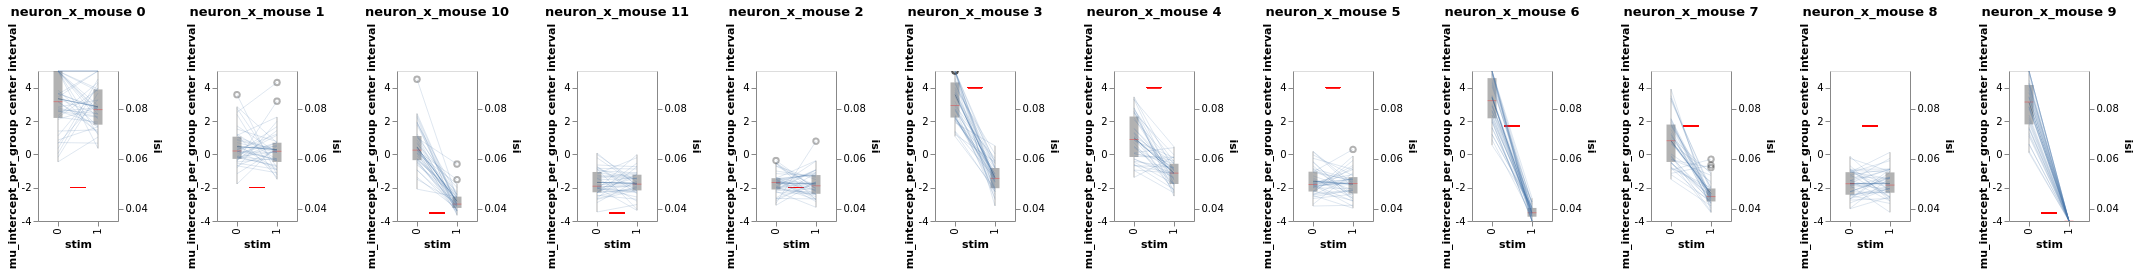

In [21]:
bw.plot_slopes_intercepts(column='neuron_x_mouse')

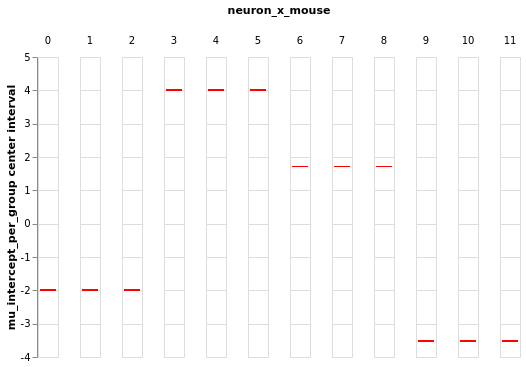

In [6]:
y='mu_intercept_per_group center interval'
posterior_intercept=alt.Chart(bw.data_and_posterior).mark_tick(color='red').encode(
    
y=alt.Y(y,
        scale=alt.Scale(domain=[bw.data_and_posterior[y].min(),bw.data_and_posterior[y].max()])
       )
)
posterior_intercept.facet(column='neuron_x_mouse')

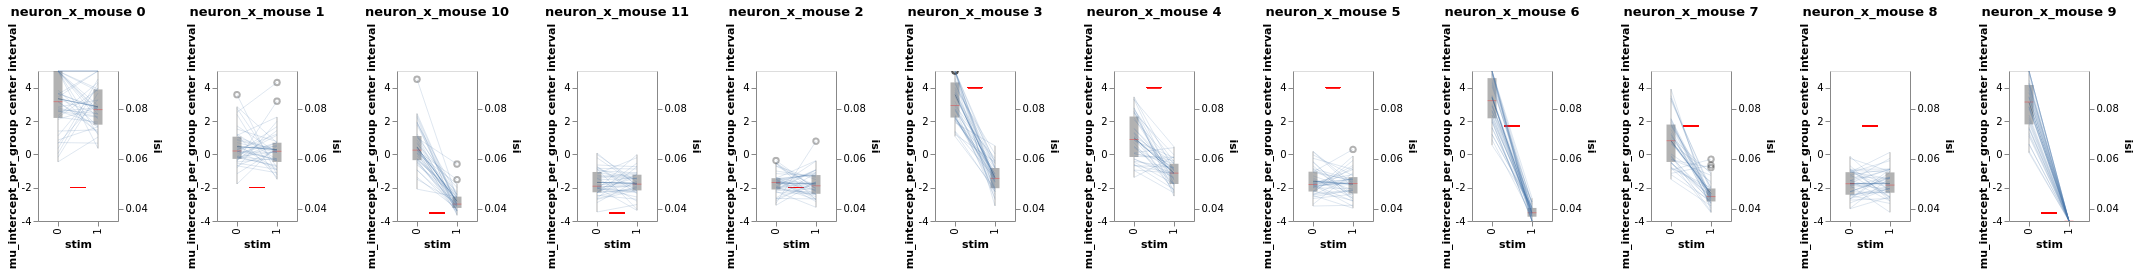

In [7]:
# Redo boxplot (no need to show)
bw.data_box_detail(data=bw.data_and_posterior,autofacet=False);

# bw.chart_data_box_detail.facet(column='neuron_x_mouse')

chart=(posterior_intercept+bw.chart_data_box_detail).resolve_scale(y='independent')
from bayes_window import visualization
visualization.facet(chart,column=bw.condition[0])

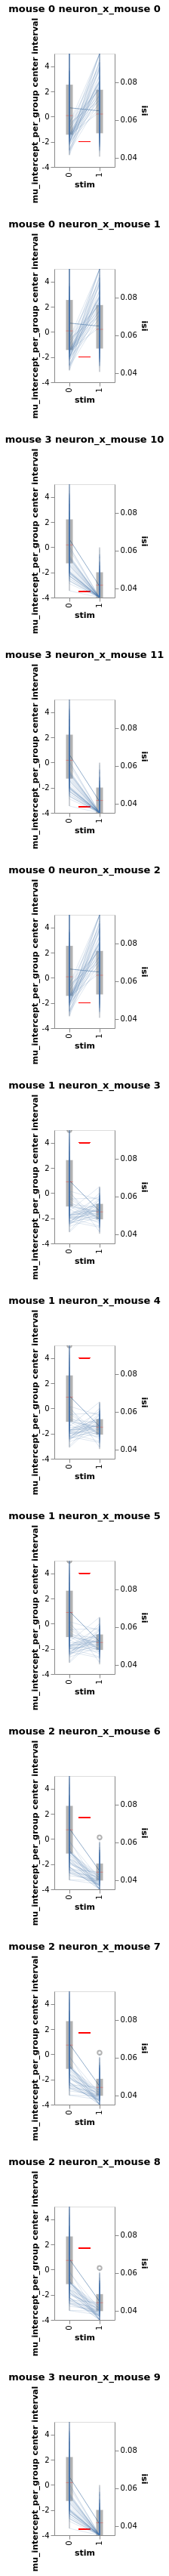

In [10]:
visualization.facet(chart, **visualization.auto_facet(bw.group, bw.condition))

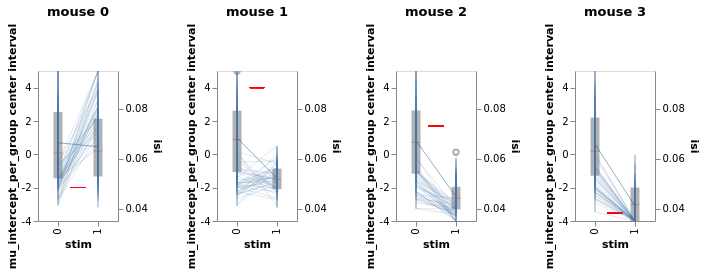

In [8]:
visualization.facet(chart,column='mouse')

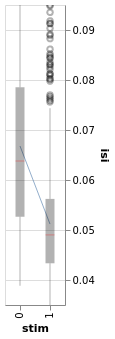

In [26]:
bw.chart_data_box_for_detail

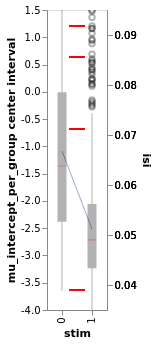

In [27]:
(bw.chart_data_box_for_detail+posterior_intercept).resolve_scale(y='independent')


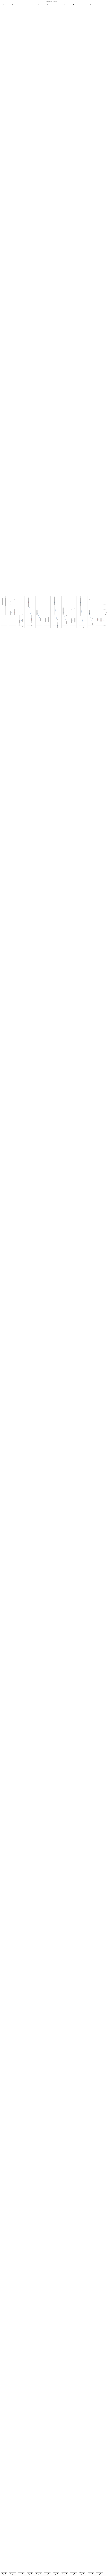

In [29]:
(bw.chart_data_box_for_detail+posterior_intercept).facet(column='neuron_x_mouse')


In [35]:
(bw.chart_data_box_for_detail+posterior_intercept).resolve_scale(y='independent').facet(column='mouse')

JavascriptError: Error: Unrecognized scale name: "child_layer_3_y"

alt.FacetChart(...)

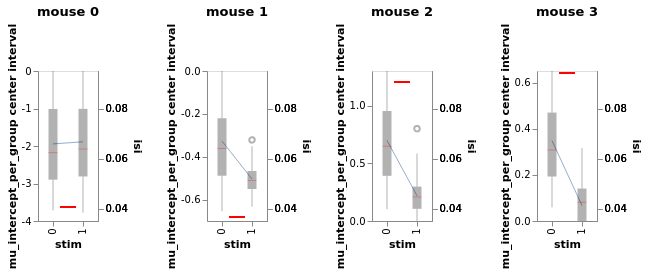

TODO use magic faceter

In [19]:
(self.chart_data_detail+posterior_intercept).resolve_axis(y='independent')#.facet(column='mouse')

NameError: name 'self' is not defined

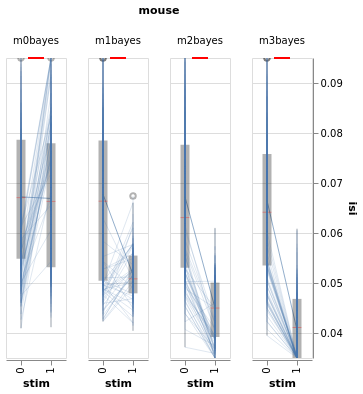

In [21]:
(self.data_box_detail(data=full_data_with_posterior,autofacet=False)+posterior_intercept).facet(column='mouse')

In [22]:
from bayes_window.utils import fill_row
df_data = self.data_and_posterior
df_bayes=self.data
posterior_index_name='combined_condition'
data=pd.concat([fill_row(group_val, data_rows, df_bayes, posterior_index_name)
                  for group_val, data_rows in df_data.groupby([posterior_index_name])])

In [23]:
self.chart_data_box_detail+

SyntaxError: invalid syntax (<ipython-input-23-117874cac15c>, line 1)

TODO fill in original conditions something like this:

In [ ]:
data

In [ ]:
df_result=data
if ('combined_condition' in self.original_data.columns) and ('combined_condition' in df_result.columns):
    levels_to_replace = list(set(self.levels) - {self.treatment})
    for level_values, data_subset in self.original_data.groupby(levels_to_replace):
        if not hasattr(level_values, '__len__'):  # This level is a scalar
            level_values = [level_values]
        for level_name, level_value in zip(levels_to_replace, level_values):
            df_result.loc[df_result['combined_condition'] == data_subset['combined_condition'].iloc[0],
                          level_name] = level_value        # sanity check:


In [ ]:
posterior_intercept=alt.Chart(self.data_and_posterior).mark_bar(color='red').encode(
#x='dummy_x',
y='mu_intercept_per_group center interval')


(posterior_intercept+ self.chart_data_detail)#.facet(column=self.group)

In [ ]:
self.data_box_detail(data=self.data_and_posterior)

# data_details

In [ ]:
bw = workflow.BayesWindow(df, y='isi', treatment='stim', condition='neuron_x_mouse', group='mouse', detail='i_trial')
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',
              fold_change_index_cols=('stim', 'mouse', 'neuron','neuron_x_mouse', 'i_trial'));

In [ ]:

reload(workflow)
bw = workflow.BayesWindow(df, y='isi', treatment='stim', condition='neuron', group='mouse', detail='i_trial')
# bw.plot(x='neuron',color='stim',detail='i_trial',add_box=False).facet(column='mouse',)
bw.chart_data_box_detail

# Create_data_slopes

This should trigger a warning. 'i_trial' in detail=

In [ ]:
bw = workflow.BayesWindow(df, y='isi', treatment='stim', condition='neuron_x_mouse', group='mouse', )
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',
              fold_change_index_cols=('stim', 'mouse', 'neuron','neuron_x_mouse',));
bw.chart_posterior


No warning should be displayed below:

In [ ]:
bw = workflow.BayesWindow(df, y='isi', treatment='stim', condition='neuron_x_mouse', group='mouse', detail='i_trial' )
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract')

bw.chart_posterior


# data_details

In [ ]:
bw = workflow.BayesWindow(df, y='isi', treatment='stim', condition='neuron_x_mouse', group='mouse', detail='i_trial')
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',
              fold_change_index_cols=('stim', 'mouse', 'neuron','neuron_x_mouse', 'i_trial'));

In [ ]:

reload(workflow)
bw = workflow.BayesWindow(df, y='isi', treatment='stim', condition='neuron', group='mouse', detail='i_trial')
# bw.plot(x='neuron',color='stim',detail='i_trial',add_box=False).facet(column='mouse',)
bw.chart_data_box_detail

## Without detail:

In [ ]:

reload(workflow)
bw = workflow.BayesWindow(df, y='isi', treatment='stim', condition='neuron', group='mouse', )
# bw.plot(x='neuron',color='stim',detail='i_trial',add_box=False).facet(column='mouse',)
bw.chart_data_box_detail

# Create_posterior_charts

In [ ]:
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',
              fold_change_index_cols=('stim', 'mouse', 'neuron','neuron_x_mouse', 'i_trial'))
bw.create_posterior_charts(x='neuron:O',column='mouse')

In [ ]:
bw.chart_posterior

## More manual faceting and composing

In [ ]:
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',
              fold_change_index_cols=('stim', 'mouse', 'neuron','neuron_x_mouse', 'i_trial'))
bw.create_posterior_charts(x='neuron:O')

In [ ]:
x='neuron'
y='isi diff'
alt.Chart(bw.data_and_posterior).mark_boxplot(
            clip=True, opacity=.3, size=9, color='black',
            median=alt.MarkConfig(color='red', strokeWidth=20)
        ).encode(
            x=x,
            y=alt.Y(f'{y}:Q',
                    axis=alt.Axis(orient='right', title=''),
                    )
        )

In [ ]:
bw.chart_data_boxplot.facet(column='neuron_x_mouse')

In [ ]:
(bw.chart_posterior+bw.chart_data_boxplot).facet(column='mouse')

Fix:

In [ ]:
from bayes_window.visualization import facet
facet(alt.layer(bw.chart_data_boxplot,bw.chart_posterior).resolve_scale(y='independent'), 'mouse')

In [ ]:
facet((bw.chart_data_boxplot+bw.chart_posterior).resolve_scale(y='independent'), 'mouse')

In [ ]:
#bw.facet(bw,column='mouse_code')

In [ ]:
bw.charts[2]

In [ ]:
alt.layer(*bw.charts).resolve_scale(y='independent')

In [ ]:
bw.chart_posterior|bw.chart_data_boxplot|bw.chart_posterior_kde

If x axis, can't use `+`. Must call `alt.layer()`:

In [ ]:
(bw.chart_data_boxplot+bw.chart_posterior).resolve_scale(y='independent')

In [ ]:
(bw.chart_posterior+bw.chart_data_boxplot).facet(column='mouse').resolve_scale(y='independent')

In [ ]:
alt.layer(bw.chart_posterior,bw.chart_data_boxplot).resolve_scale(y='independent')

In [ ]:
bw.plot(x='neuron:O')

In [ ]:
df, df_monster, index_cols, firing_rates = generate_fake_spikes(n_trials=5,
                                                                n_neurons=3,
                                                                n_mice=4,
                                                                dur=7,
                                                                mouse_response_slope=16)

reload(workflow)
bw = workflow.BayesWindow(df, y='isi', treatment='stim', condition='neuron', group='mouse')
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',
              fold_change_index_cols=('stim', 'mouse', 'neuron'))
bw.create_posterior_charts()

In [ ]:
alt.layer(*bw.charts)

In [ ]:
alt.layer(*bw.charts_for_facet).facet(column='neuron')

In [ ]:
(bw.chart_posterior+bw.chart_data_boxplot).resolve_scale(y='independent')

In [ ]:
bw.chart_posterior|bw.chart_data_boxplot|bw.chart_posterior_kde

In [ ]:
(bw.chart_posterior+bw.chart_data_boxplot).resolve_scale(y='independent')

In [ ]:
(bw.chart_posterior+bw.chart_data_boxplot+bw.chart_posterior_kde).resolve_scale(y='independent')

In [ ]:
df, df_monster, index_cols, firing_rates = generate_fake_spikes(n_trials=5,
                                                                n_neurons=3,
                                                                n_mice=4,
                                                                dur=7,
                                                                mouse_response_slope=16)
bw = BayesWindow(df, y='isi', treatment='stim', condition='neuron_x_mouse', group='mouse')
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',
              fold_change_index_cols=('stim', 'mouse', 'neuron'))


In [ ]:
bw.create_posterior_charts(x='neuron:O')

In [ ]:
bw.chart_posterior|bw.chart_data_boxplot|bw.chart_posterior_kde

In [ ]:
(bw.chart_posterior+bw.chart_data_boxplot).resolve_scale(y='independent')

In [ ]:
(bw.chart_posterior+bw.chart_data_boxplot).resolve_scale(y='independent')

In [ ]:
# Draw some fake data:
df1, df_monster, index_cols, _ = generate_fake_lfp(mouse_response_slope=9, n_trials=30)

# Show off all display methods:
import itertools 
# Initialize and fit again:
window=BayesWindow(df1, y='Log power', treatment='stim', group='mouse')
window.fit_slopes(model=models.model_hierarchical,add_group_slope=False,
                  do_make_change='subtract', dist_y='student');
# Plot:
for ia, ap, ab in itertools.product([True,False], [True,False], [True,False], ):
    window.plot(independent_axes=ia,x=':O',
                add_posterior_density=ap,add_box=ab
               ).properties(title=f'Independent axes {ia}, posterior density {ap}, box {ab}').display()